# Matthew Block: Exploratory Data Analysis Project  
Author: Matthew Block  
Date: 01 FEB 2025  
## Introduction
This project was created for learning exploratory data analysis techniques in the Data Fundamentals course as part of the M.S. in Data Analytics program at Northwest Missouri State University under the instruction of Dr. Denise Case.  
We'll look at an iris (the flower) dataset common to data science study. Our exploratory data analysis should help us prepare for researching further questions by examining the scope of the dataset and discovering some special considerations to keep in mind moving forward.

## 1. Imports
We'll start by importing the packages we'll need for this exploration:
1. pandas
2. numpy
3. matplotlib
4. seaborn

In [100]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

## 2. Load Dataset
The Iris dataset is a well-known dataset in data science and machine learning, often used for various classification tasks and basic data exploration.

In [101]:
# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head(7)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa


## 3. Initial Data Inspection
The VS Code plugin "Data Wrangler" is a great tool for quickly seeing a lot of this info for a dataset. But to explore with Python we can use:

In [102]:
# Inspect the shape of the DataFrame with shape attribute
iris_df.shape

(150, 5)

It looks like our dataset contains 150 different specimens, with five characteristics recorded of each.

In [103]:
# Inspect the data types of the columns with dtypes attribute
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [104]:
# Inspect the data types of the columns with info() method
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


With no null values in any of the columns, this looks like a pretty clean dataset ready to explore. The four float columns should give us a lot to look into.  
With plants, the leaf area has a lot to do with how much the plant can photosynthesize. While that's something I'm intersted in exploring, that is outside the scope of this dataset since only petal and sepal dimensions are documented. I'll have to find a different dataset if I want to explore that further.

## 4. Initial Descriptive Statistics

In [105]:
# Inspect summary statistics for numerical columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Nothing stands out to me here. Maybe a graphical depiction might help.

##  5. Initial Data Distribution for Numerical Columns  
Sometimes it helps to see graphical representations to better wrap our heads around what's going on.

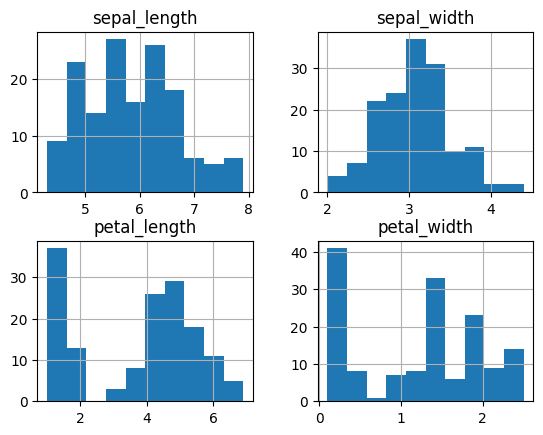

In [106]:
# Inspect histograms for ALL numerical columns
iris_df.hist()

# Show all plots
matplotlib.pyplot.show()

### Observations
The first thing I notice is that sepal width is the only field that appears to have a normal distribution. Petal length appears to have a small one on the right with stray data on the left.  
My first hypothesis would be that we have different varieties or species represented with distinct characteristics that are causing this look. So the next thing I want to look at is how many different species are represented in the dataset:

In [107]:
# Inspect the number of unique species
print(f"Number of unique species = {iris_df['species'].nunique()}")

Number of unique species = 3


We can also use value_counts to examine how many of each there are:

In [108]:
# Inspect value counts by categorical column
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

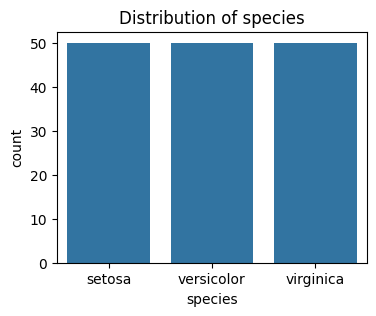

In [109]:
# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    matplotlib.pyplot.figure(figsize=(4, 3))
    sns.countplot(x=col, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {col}')

    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

### More Observations
Since we only have one categorical column, the loop didn't add much. And since we only have three species with an even distribution, the plot doesn't show us much that wasn't obvious from the text output.  
But with three species, that might explain why the sepal length plot above appeared to have three distinct peaks. That makes me think that seeing the distributions divided by species instead of all grouped together may be more enlightening.

## 6. Initial Data Transformation and Feature Engineering
We have lengths and widths, which can give us area (which might be worth exploring on its own). So let's add a couple columns that calculate the area of the petals and sepals:

In [110]:

# Adding a new column
iris_df['Sepal Area'] = iris_df['sepal_length'] * iris_df['sepal_width']
iris_df['Petal Area'] = iris_df['petal_length'] * iris_df['petal_width']


##  7. Initial Visualizations
A pairplot can quickly give us a feel of how the different characteristics relate to each other and where there might be something noteworthy to explore:

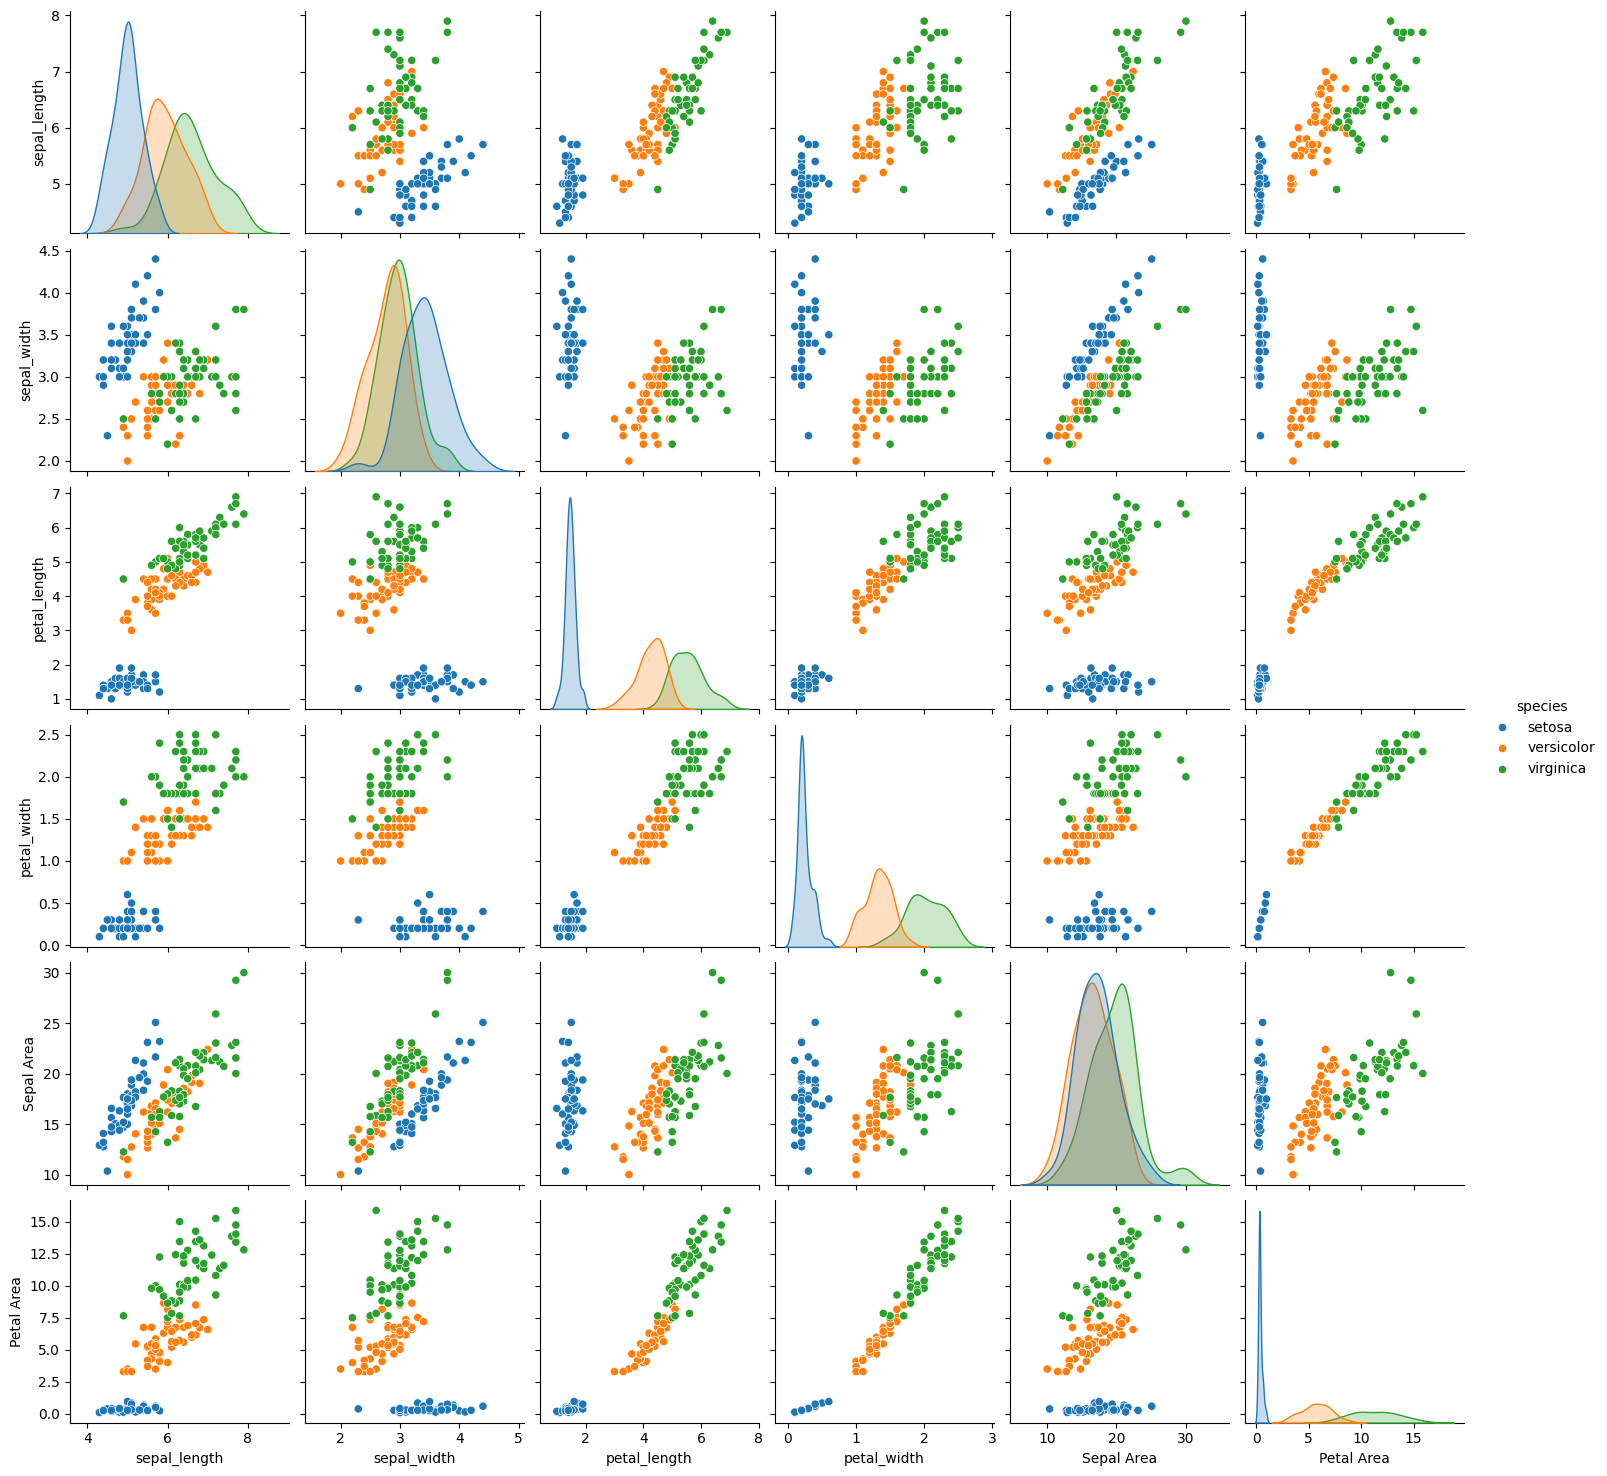

In [111]:
# Create a pairplot of the Iris dataset
# The hue parameter is used to color the data points by species (a categorical column)
sns.pairplot(iris_df, hue='species')

# Show all plots
matplotlib.pyplot.show()

If we find a comparison worth taking a closer look, we can generate a specific plot. Let's use the petal area vs sepal area comparison.  
The default graph can skew the representation by compressing the ranges, so for the closer look I want to lock the axes to zero and ensure both axes use the same scale to get a more accurate picture.

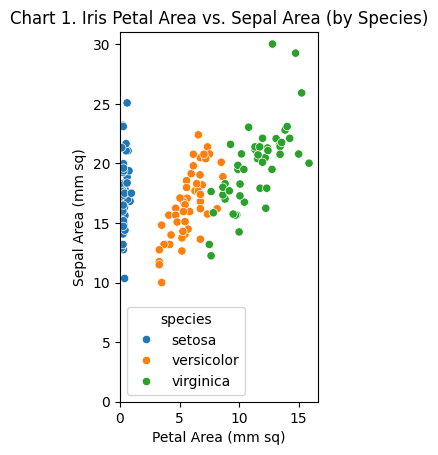

In [112]:
# A scatter plot is a plot of two numerical variables.
scatter_plt = sns.scatterplot(
    data=iris_df, x="Petal Area", y="Sepal Area", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Petal Area (mm sq)")
scatter_plt.set_ylabel("Sepal Area (mm sq)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Iris Petal Area vs. Sepal Area (by Species)")

# Set the x and y axis limits to include 0
scatter_plt.set_xlim(0, None)
scatter_plt.set_ylim(0, None)

# Ensure both axes have the same scale
scatter_plt.set_aspect('equal', adjustable='box')

matplotlib.pyplot.show()

##  8. Initial Insights  
The visualizations broken out by species confirm my hypothesis that we're looking at three distinct species with fairly normal distribution of variance in each. Knowing this, before performing any analysis to answer questions about irises, we'll want to segregate the dataset into its different species and always look at them separately. Trying to look at the aggregate inserts a lot of noise and will make it much more difficult to discover any useful isights.